In [23]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import re
def parse_duration(duration):
    # Regex für das Format PT11M1.701S
    match = re.match(r'PT(\d+)M(\d+\.\d+)S', duration)
    if not match:
        raise ValueError("Ungültiges Format")
    
    minutes = int(match.group(1))
    seconds = float(match.group(2))
    
    total_seconds = minutes * 60 + seconds
    return total_seconds

# Function for Gaussian fit
def gaussian(x, a, mu, sigma, b):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2)) + b

# Initial guesses for the parameters of the Gaussian fits
def fit_peak(x, y, initial_guess):
    # Perform curve fitting
    params, pcov = curve_fit(gaussian, x, y, p0=initial_guess)
    return params, pcov

# Definition der linearen Funktion
def linear_func(x, slope, intercept):
    return slope * x + intercept

print("run")

run


Daten eingelesen
n Total: 1477.576891722716
n Total Err: 131.83070378632928
n peak: 271.3314916944728
Amplitude: 0.08059142377355666 ± 0.00298445525870634
Mittelwert (mu): 1801.7538635244387 ± 2.4817422021144147
Sigma: 60.75163217741722 ± 2.8147265744060674
Basiswert (b): 0.24806335022963658 ± 0.0012458859077908284


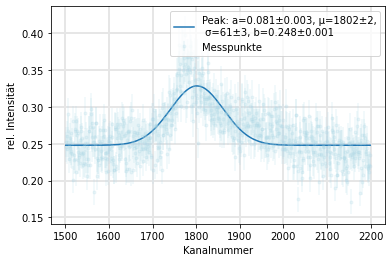

n Back: 103.71430174493632


In [49]:
datei_pfad = '521/Ge_cs.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()

# Extrahieren der RealTimeDuration und ChannelData Daten

# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))


print("Daten eingelesen") 


# Konvertiere die Liste in ein numpy Array
total_seconds = parse_duration(livetime_durations[0])

y_data = np.array(channel_data_list[:-1])/ total_seconds
x_data = np.arange(len(y_data))
y_err =  np.sqrt(np.array(channel_data_list[:-1]))/ total_seconds

nTotalMask=(x_data<7250)
nTotalY=y_data[nTotalMask]
nTotal=0
nTotErr=0
for n in y_data:
    nTotal+=n
for n in y_err:
    nTotErr+=n
    
print(f'n Total: {nTotal}')   
print(f'n Total Err: {nTotErr}')                                       


nPeakMask=(x_data> (6295-3*6.1))&(x_data< (6295+3*6.1))
nPeakY=y_data[nPeakMask]
nPeak=0
for n in nPeakY:
    nPeak+=n
    # print(n)
    # print()
print(f'n peak: {nPeak}')                                       



# Fit first peak
mask=(x_data<2200)&(x_data>1500)
newxdata=x_data[mask]
newydata=y_data[mask]
newyerr=y_err[mask]
initial_guess = [1, 1800, 4, 0]

# Curve fitting
popt, pcov = curve_fit(gaussian, newxdata, newydata, p0=initial_guess)

# Extrahieren der Parameter und Unsicherheiten
a, mu, sigma, b = popt
delta_a, delta_mu, delta_sigma, delta_b = np.sqrt(np.diag(pcov))

print(f'Amplitude: {a} ± {delta_a}')
print(f'Mittelwert (mu): {mu} ± {delta_mu}')
print(f'Sigma: {sigma} ± {delta_sigma}')
print(f'Basiswert (b): {b} ± {delta_b}')
plt.errorbar(newxdata, newydata, yerr=newyerr, fmt='.', label='Messpunkte', color='lightblue',alpha=0.2)

plt.plot(newxdata, gaussian(newxdata, *popt), label=f'Peak: a={a:.3f}±{delta_a:.3f}, μ={mu:.0f}±{delta_mu:.0f},\n σ={sigma:.0f}±{delta_sigma:.0f}, b={b:.3f}±{delta_b:.3f} ' )
    
plt.xlabel('Kanalnummer')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend(loc=1)
# plotname = '521/GeCsBack.png'
# plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()


nBackMask=(x_data> (1802-3*61))&(x_data< (1802+3*61))
nBackY=y_data[nBackMask]
nBack=0
for n in nBackY:
    nBack+=n
print(f'n Back: {nBack}') 


Daten eingelesen
 Livetime in s: 607.667
Daten eingelesen


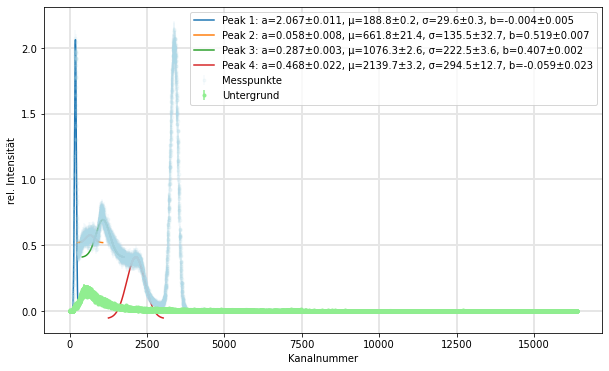

n Total: 1907.724876854312
n Total Err: 107.74254167419222


In [63]:
# Pfad zur hochgeladenen .n42 Datei
datei_pfad = '521/NaJ_untergrund.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()

# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))

# # # Ausgabe der extrahierten Daten
# print("RealTimeDuration Daten:")
# for duration in livetime_durations:
#     print(duration)

# print("\nChannelData Daten:")
# for channel_data in channel_data_list:
#     print(channel_data)

print("Daten eingelesen") 

total_seconds = parse_duration(livetime_durations[0])

y_dataBG = np.array(channel_data_list[:-1])/ total_seconds
x_dataBG = np.arange(len(y_data))
y_errBG =  np.sqrt(np.array(channel_data_list[:-1])) / total_seconds

print(f' Livetime in s: {total_seconds}')



datei_pfad = '521/NaJ_cs.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()


# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))

print("Daten eingelesen") 



# Konvertiere die Liste in ein numpy Array
total_seconds = parse_duration(livetime_durations[0])

y_data = np.array(channel_data_list[:-1])/ total_seconds
x_data = np.arange(len(y_data))
y_err =  np.sqrt(np.array(channel_data_list[:-1])) / total_seconds

# Fit parameters for each peak
peak_params = []
peak_covs = []

# Fit first peak
mask=(x_data<220)
newxdata=x_data[mask]
newydata=y_data[mask]
newyerr=y_err[mask]
initial_guess = [1, 198, 4, 0]

# Fit first peak
initial_guess_first_peak = (max(newydata), np.argmax(newydata), 1.0, min(newydata))
params_first_peak, pcov_first_peak = fit_peak(newxdata, newydata, initial_guess_first_peak)
peak_params.append(params_first_peak)
peak_covs.append(pcov_first_peak)

# Manuell festgelegte Anfangswerte für den zweiten Peak
mask = (x_data > 220) & (x_data < 800)

x_data_second_peak = x_data[mask]
y_data_second_peak = y_data[mask]
initial_guess_second_peak = (1, 661, 6, 1)
params_second_peak, pcov_second_peak = fit_peak(x_data_second_peak, y_data_second_peak, initial_guess_second_peak)
peak_params.append(params_second_peak)
peak_covs.append(pcov_second_peak)

# Dritter Peak
mask = (x_data > 800) & (x_data < 2000)
x_data_third_peak = x_data[mask]
y_data_third_peak = y_data[mask]
initial_guess_third_peak = (1, 1076, 2, 1)
params_third_peak, pcov_third_peak = fit_peak(x_data_third_peak, y_data_third_peak, initial_guess_third_peak)
peak_params.append(params_third_peak)
peak_covs.append(pcov_third_peak)

# Vierter Peak
mask = (x_data > 2000) & (x_data < 2600)

x_data_fourth_peak = x_data[mask]
y_data_fourth_peak = y_data[mask]
initial_guess_fourth_peak = (1, 2250, 1, 50)
params_fourth_peak, pcov_fourth_peak = fit_peak(x_data_fourth_peak, y_data_fourth_peak, initial_guess_fourth_peak)
peak_params.append(params_fourth_peak)
peak_covs.append(pcov_fourth_peak)



# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data, yerr=y_err, fmt='.', label='Messpunkte', color='lightblue', alpha=0.1)
plt.errorbar(x_dataBG, y_dataBG, yerr=y_errBG, fmt='.', label='Untergrund', color='lightgreen')
# Plot individual fits
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    a_fit, mu_fit, sigma_fit, b_fit = params
    delta_a_fit, delta_mu_fit, delta_sigma_fit, delta_b_fit = np.sqrt(np.diag(pcov))
    if sigma_fit < 0:
        sigma_fit = -1 * sigma_fit
    x_fit = np.linspace(params[1] - 3 * params[2], params[1] + 3 * params[2], 1000)
    plt.plot(x_fit, gaussian(x_fit, *params), label=f'Peak {i+1}: a={a_fit:.3f}±{delta_a_fit:.3f}, μ={mu_fit:.1f}±{delta_mu_fit:.1f}, σ={sigma_fit:.1f}±{delta_sigma_fit:.1f}, b={b_fit:.3f}±{delta_b_fit:.3f}')
        
    
plt.xlabel('Kanalnummer')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend(loc=1)

# Speichere den Plot
plotname = '521/SzCsBack.png'
plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()



nTotal=0
nTotErr=0
for n in y_data:
    nTotal+=n
for n in y_err:
    nTotErr+=n
    
print(f'n Total: {nTotal}')   
print(f'n Total Err: {nTotErr}')         

Daten eingelesen


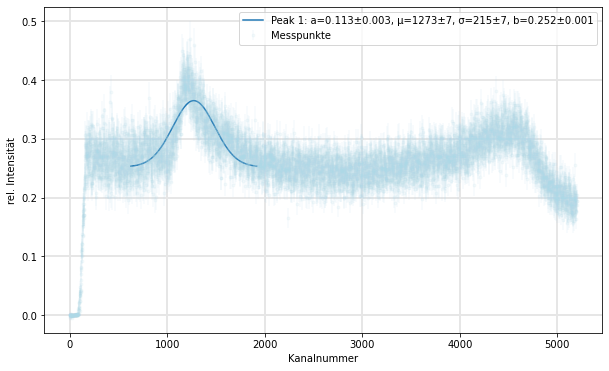

In [92]:

datei_pfad = '521/NaJ_co.n42'

# XML-Datei einlesen und parsen
tree = ET.parse(datei_pfad)
root = tree.getroot()


# Extrahieren der RealTimeDuration und ChannelData Daten
livetime_durations = []
channel_data_list = []

# Durchlaufe alle RealTimeDuration Elemente
for lt_duration in root.findall('.//{http://physics.nist.gov/N42/2011/N42}LiveTimeDuration'):
    livetime_durations.append(lt_duration.text)

# Durchlaufe alle ChannelData Elemente und konvertiere die Daten in Integers
for channel_data in root.findall('.//{http://physics.nist.gov/N42/2011/N42}ChannelData'):
    channel_data_list.extend(map(int, channel_data.text.split()))



print("Daten eingelesen") 


# Konvertiere die Liste in ein numpy Array
total_seconds = parse_duration(livetime_durations[0])

y_data = np.array(channel_data_list[:-1])/ total_seconds
x_data = np.arange(len(y_data))
y_err =  np.sqrt(np.array(channel_data_list[:-1])) / total_seconds

y_data=y_data-y_dataBG

# Fit parameters for each peak
peak_params = []
peak_covs = []
mask =  (x_data < 5200)
x_data=x_data[mask]
y_data=y_data[mask]
y_err=y_err[mask]

# Fit first peak
# mask = (x_data > 1000) & (x_data < 2000)

newxdata=x_data  #[mask]
newydata=y_data  #[mask]
newyerr=y_err  #[mask]
initial_guess = [1, 1273, 0.4, 0]

# Fit first peak
initial_guess_first_peak = (max(newydata), np.argmax(newydata), 1.0, min(newydata))
params_first_peak, pcov_first_peak = fit_peak(newxdata, newydata, initial_guess_first_peak)
peak_params.append(params_first_peak)
peak_covs.append(pcov_first_peak)

# # Manuell festgelegte Anfangswerte für den zweiten Peak
# mask = (x_data > 220) & (x_data < 800)

# x_data_second_peak = x_data[mask]
# y_data_second_peak = y_data[mask]
# initial_guess_second_peak = (1, 661, 6, 1)
# params_second_peak, pcov_second_peak = fit_peak(x_data_second_peak, y_data_second_peak, initial_guess_second_peak)
# peak_params.append(params_second_peak)
# peak_covs.append(pcov_second_peak)

# # Dritter Peak
# mask = (x_data > 800) & (x_data < 2000)
# x_data_third_peak = x_data[mask]
# y_data_third_peak = y_data[mask]
# initial_guess_third_peak = (1, 1076, 2, 1)
# params_third_peak, pcov_third_peak = fit_peak(x_data_third_peak, y_data_third_peak, initial_guess_third_peak)
# peak_params.append(params_third_peak)
# peak_covs.append(pcov_third_peak)

# # Vierter Peak
# mask = (x_data > 2000) & (x_data < 2600)

# x_data_fourth_peak = x_data[mask]
# y_data_fourth_peak = y_data[mask]
# initial_guess_fourth_peak = (1, 2250, 1, 50)
# params_fourth_peak, pcov_fourth_peak = fit_peak(x_data_fourth_peak, y_data_fourth_peak, initial_guess_fourth_peak)
# peak_params.append(params_fourth_peak)
# peak_covs.append(pcov_fourth_peak)



# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data, yerr=y_err, fmt='.', label='Messpunkte', color='lightblue', alpha=0.1)
# plt.errorbar(x_dataBG, y_dataBG, yerr=y_errBG, fmt='.', label='Untergrund', color='lightgreen', alpha=0.5)
# Plot individual fits
for i, (params, pcov) in enumerate(zip(peak_params, peak_covs)):
    a_fit, mu_fit, sigma_fit, b_fit = params
    delta_a_fit, delta_mu_fit, delta_sigma_fit, delta_b_fit = np.sqrt(np.diag(pcov))
    if sigma_fit < 0:
        sigma_fit = -1 * sigma_fit
    x_fit = np.linspace(params[1] - 3 * params[2], params[1] + 3 * params[2], 1000)
    plt.plot(x_fit, gaussian(x_fit, *params), label=f'Peak {i+1}: a={a_fit:.3f}±{delta_a_fit:.3f}, μ={mu_fit:.0f}±{delta_mu_fit:.0f}, σ={sigma_fit:.0f}±{delta_sigma_fit:.0f}, b={b_fit:.3f}±{delta_b_fit:.3f}')
        
    
plt.xlabel('Kanalnummer')
plt.ylabel('rel. Intensität')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend(loc=1)

# Speichere den Plot
plotname = '521/SzCoBack.png'
plt.savefig(plotname, bbox_inches=0, dpi=600)
plt.show()


# bereinigt